---
title: "Skill Gap Analysis"
subtitle: "Compare the skills required in IT job postings against the actual skills of your group members to identify knowledge gaps and areas for improvement."
author:
  - name: Furong Wang
    affiliations:
      - id: bu
        name: Boston University
        city: Boston
        state: MA
  - name: Marco Perez Garcia
    affiliations:
      - ref: bu
bibliography: references.bib
csl: csl/econometrica.csl
format: 
  html:
    toc: true
    number-sections: true
    df-print: paged
---

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from collections import Counter
import json
import ast

# **Team-based Skill Dataframe**

With our chosen IT career path as Business Analysts, we identified our current skills relevant to the role and assessed proficiency levels using a numerical scale from 1 to 5:  
1 = Beginner   
2 = Basic Knowledge   
3 = Intermediate   
4 = Advanced   
5 = Expert  

The following heatmap visualized our team strengths and gaps.

In [48]:
job_postings = pd.read_csv("lightcast_job_postings.csv", low_memory = False)

In [52]:
team_skills_data = {
    "Name": ["Furong", "Marco"],
    "R": [3, 3],
    "Python": [3, 4],
    "SQL": [2, 3],
    "Microsoft Excel": [5, 5],
    "Data Visulization": [4, 4],
    "Amazon Web Services": [2, 2],
    "Risk Analytics": [3, 3],
    "Data Mining": [3, 3]
}

df_team_skills = pd.DataFrame(team_skills_data)
df_team_skills.set_index("Name", inplace = True)

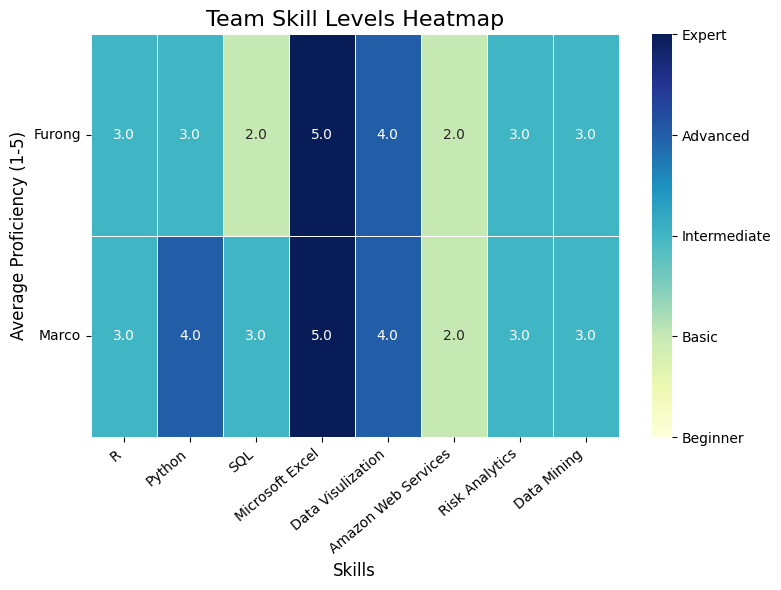

In [77]:
plt.figure(figsize = (8, 6))
heatmap = sns.heatmap(df_team_skills, annot = True, cmap = "YlGnBu", 
                    linewidths = 0.5, fmt = ".1f", vmin = 1, vmax = 5)

cbar = heatmap.collections[0].colorbar
cbar.set_ticks([1, 2, 3, 4, 5])
cbar.set_ticklabels(['Beginner', 'Basic', 'Intermediate', 'Advanced', 'Expert'])

plt.title("Team Skill Levels Heatmap", fontsize = 16)
plt.ylabel("Average Proficiency (1-5)", fontsize = 12)
plt.xlabel("Skills", fontsize = 12)
plt.xticks(rotation = 40, ha = 'right')
plt.yticks(rotation = 0, ha = 'right')
plt.tight_layout()
plt.show()

# **Team Skills vs. Industry Requirements**

To compare our team’s skills to industry requirements, we identified the most in-demand skills from IT job postings. We focused on the industry group `Computing Infrastructure Providers, Data Processing, Web Hosting, and Related Services`, as it closely aligns with our chosen career path.

The bar plot below illustrates the top 10 skills most in demand within IT job postings, providing insights into industry expectations.

In [ ]:
it_jobs = job_postings[job_postings['NAICS_2022_6'] == 518210]

In [ ]:
all_skills = []

def parse_skills(skills_str):
    try:
        if pd.isna(skills_str):
            return []
        try:
            return json.loads(skills_str)
        except:
            return ast.literal_eval(skills_str)
    except:
        print(f"Warning: Could not parse skills: {skills_str}")
        return []

for skills_str in it_jobs['SKILLS_NAME'].dropna():
    skills_list = parse_skills(skills_str)
    all_skills.extend(skills_list)

skill_counter = Counter(all_skills)
top_10_skills = skill_counter.most_common(10)

top_skills_df = pd.DataFrame(top_10_skills, columns = ['Skill', 'Count'])

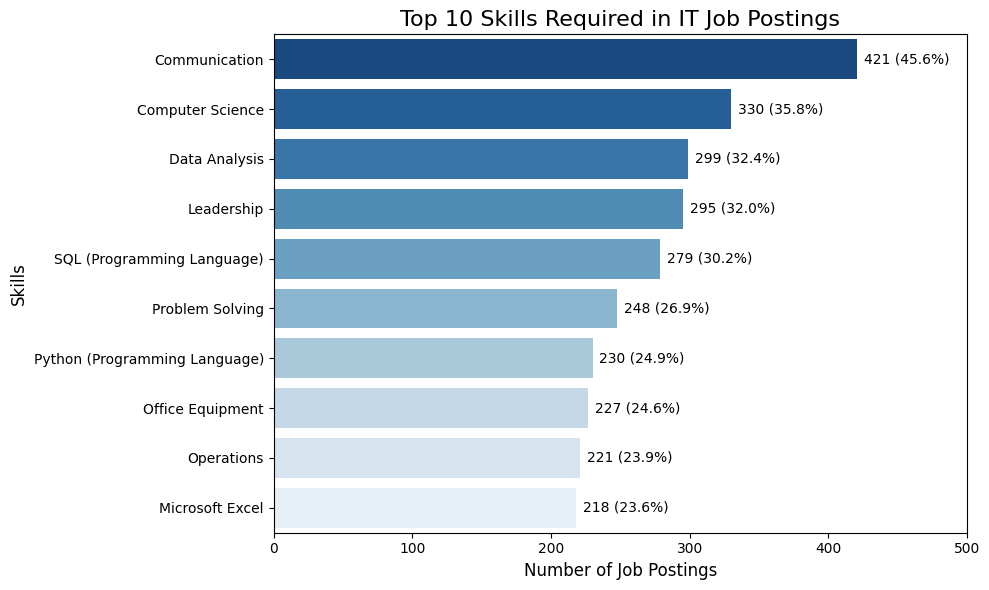

In [75]:
total_postings = len(it_jobs)
top_skills_df['Percentage'] = (top_skills_df['Count'] / total_postings * 100).round(1)
top_skills_df = top_skills_df.sort_values('Count', ascending = False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x = 'Count', 
    y = 'Skill', 
    data = top_skills_df,
    hue = 'Skill',
    palette = "Blues_r"
)
plt.title("Top 10 Skills Required in IT Job Postings", fontsize = 16)
plt.xlabel("Number of Job Postings", fontsize = 12)
plt.ylabel("Skills", fontsize = 12)
plt.xlim(0, 500) 

for i, row in enumerate(top_skills_df.itertuples()):
    plt.text(
        row.Count + 5, 
        i, 
        f"{row.Count} ({row.Percentage}%)",
        va='center'
    )

plt.tight_layout()
plt.show()

# **Team Skills Improvement Plan**

The bar plot of the top 10 most in-demand skills from IT job postings underscores the significance of core technical skills such as **Computer Science (35.8%)**, **Data Analysis (32.4%)**, **SQL (30.2%)**, and **Python (24.9%)**. These skills highlight the industry’s emphasis on data-driven decision-making and coding expertise as fundamental requirements.

When compared to our team’s current skill set, it is evident that we should prioritize developing knowledge in Data Science and SQL, which are highly demanded by the industry. Furthermore, while our team assessment did not initially account for **Communication**, the plot shows it as the most sought-after skill in IT job postings. This serves as a crucial reminder of the importance of teamwork, collaboration, and effective interpersonal interactions in IT careers. Technical expertise alone is insufficient; the ability to articulate ideas and communicate solutions is critical.

**The data also reveals that employers value a combination of technical proficiency, soft skills, and operational knowledge. To address skill gaps within our team, we can adopt a collaborative approach:**
1. Knowledge-sharing and mentorship: Team members skilled in communication can guide others in developing interpersonal abilities, while those with expertise in Python or SQL can lead technical workshops.
2. Specialization by strengths: Individuals strong in communication can take on tasks such as presentations and stakeholder engagement, whereas those skilled in technology can focus on back-end technical work.

This strategy not only bridges skill gaps but also optimizes team collaboration, positioning us as more competitive in the IT job market.